In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hiteshram
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [01:01<00:00, 18.7MB/s]


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/dogs-vs-cats/dogs_vs_cats"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/dogs-vs-cats/dogs_vs_cats'.
There are 2 directories and 0 images in '/content/dogs-vs-cats/dogs_vs_cats/test'.
There are 0 directories and 2500 images in '/content/dogs-vs-cats/dogs_vs_cats/test/cats'.
There are 0 directories and 2500 images in '/content/dogs-vs-cats/dogs_vs_cats/test/dogs'.
There are 2 directories and 0 images in '/content/dogs-vs-cats/dogs_vs_cats/train'.
There are 0 directories and 10000 images in '/content/dogs-vs-cats/dogs_vs_cats/train/cats'.
There are 0 directories and 10000 images in '/content/dogs-vs-cats/dogs_vs_cats/train/dogs'.


In [4]:
# Checking class names
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/dogs-vs-cats/dogs_vs_cats/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [5]:
print(class_names)

['cats' 'dogs']


In [6]:
# View random Image
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image Shape: {img.shape}")

Image Shape: (332, 500, 3)


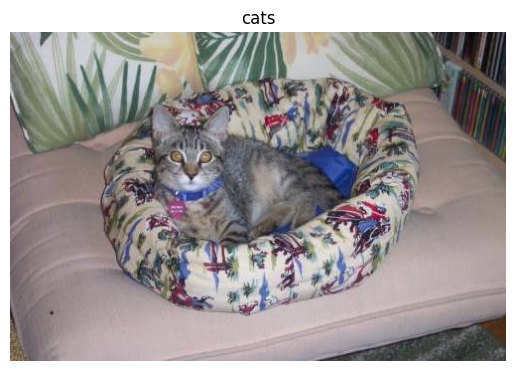

In [7]:
view_random_image(target_dir = '/content/dogs-vs-cats/dogs_vs_cats/train/', target_class = 'cats')

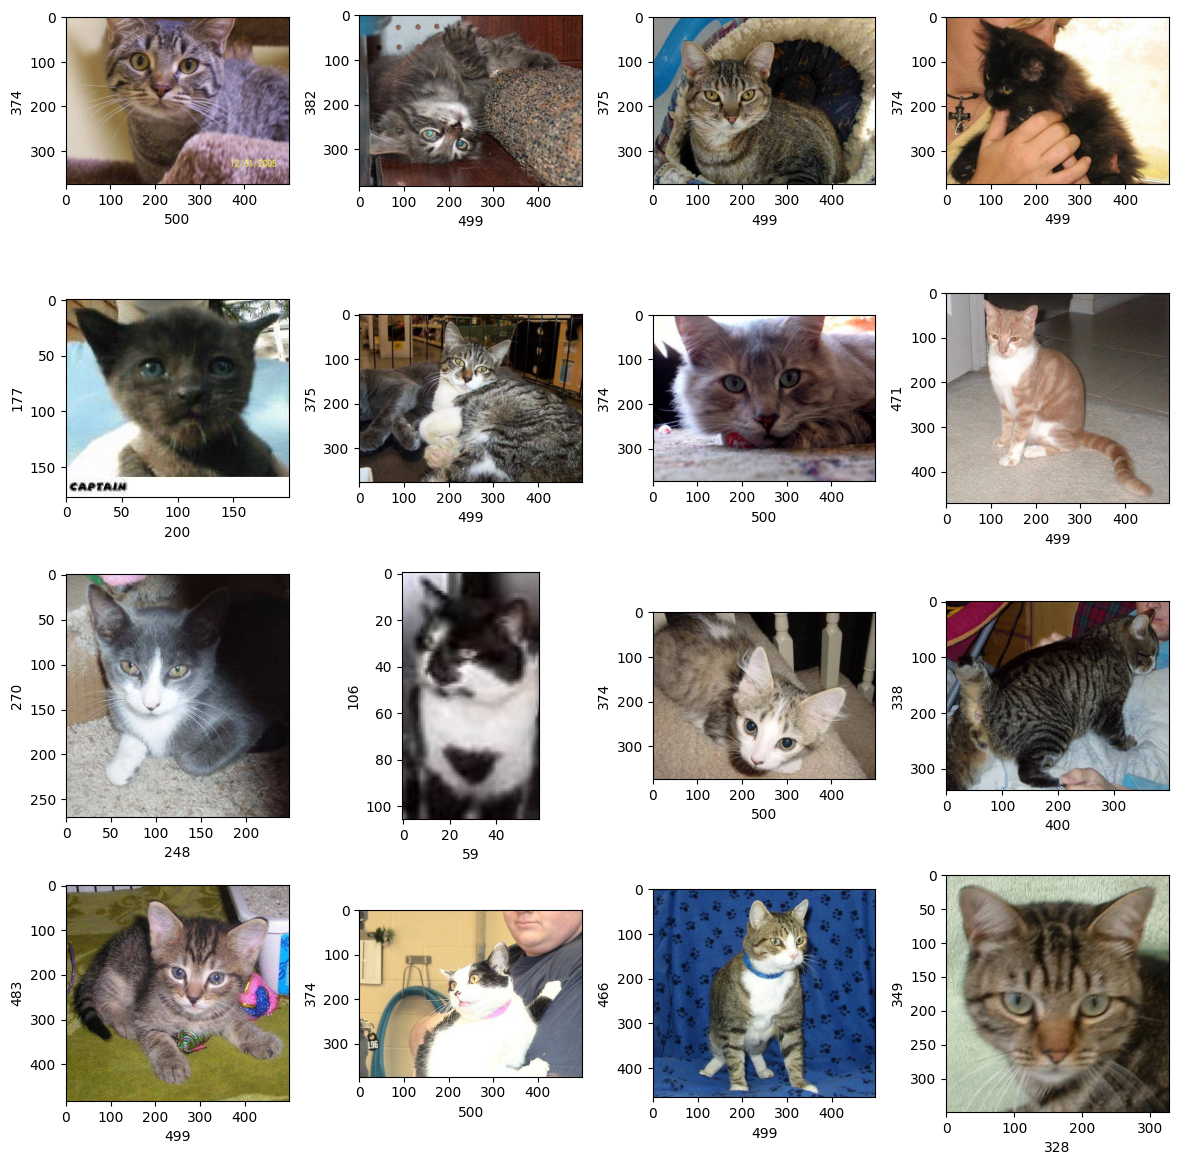

In [8]:
plt.figure(figsize = (12, 12))
path = '/content/dogs-vs-cats/dogs_vs_cats/train/cats'
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

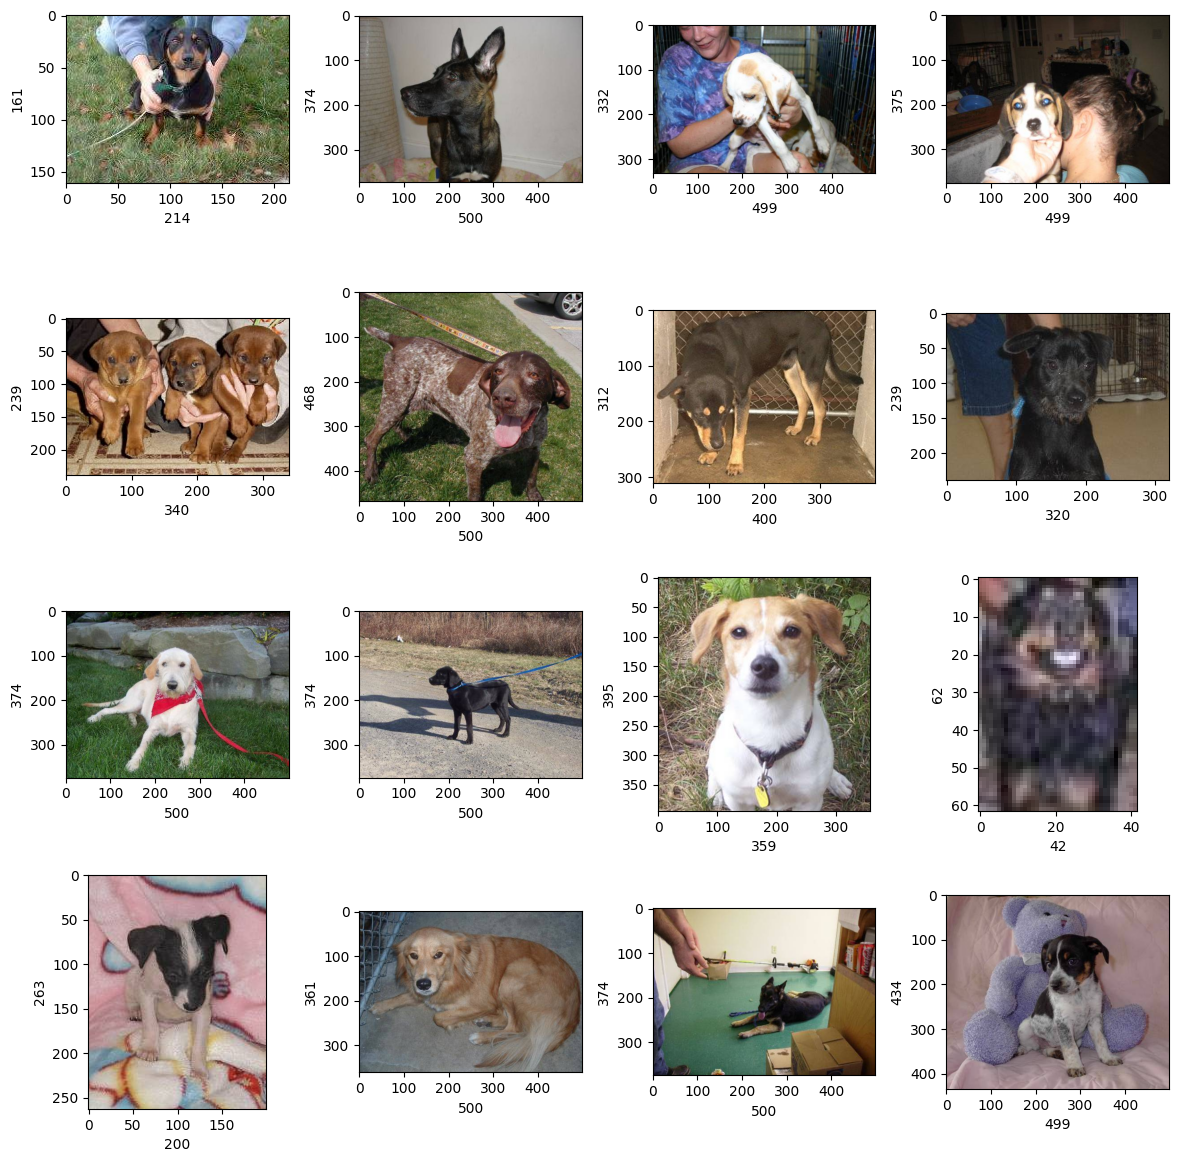

In [9]:
plt.figure(figsize = (12, 12))
path = '/content/dogs-vs-cats/dogs_vs_cats/train/dogs'
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [10]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs-vs-cats/dogs_vs_cats/train/cats'
dog_directory_path = '/content/dogs-vs-cats/dogs_vs_cats/train/dogs'

In [11]:
# Set path to the dataset
data_dir = '/content/dogs-vs-cats/dogs_vs_cats/train/'

# Hyperparameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 5
validation_split = 0.2 # 20% of data for validation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load datasets
train_datasets = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = validation_split,
    subset = 'training',
    seed = 42,
    image_size = (img_width, img_height),
    batch_size = batch_size
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


In [13]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = validation_split,
    subset = 'validation',
    seed = 42,
    image_size = (img_width, img_height),
    batch_size = batch_size
)

Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [14]:
# Data Augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)]
)

In [15]:
# Apply data augmentation only on the training dataset
train_dataset = train_datasets.map(lambda x, y: (data_augmentation(x, training = True), y))

In [16]:
# Prefetch the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE # Performance of resrouces
train_dataset = train_dataset.prefetch(buffer_size = AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size = AUTOTUNE)

##**AlexNet Model**

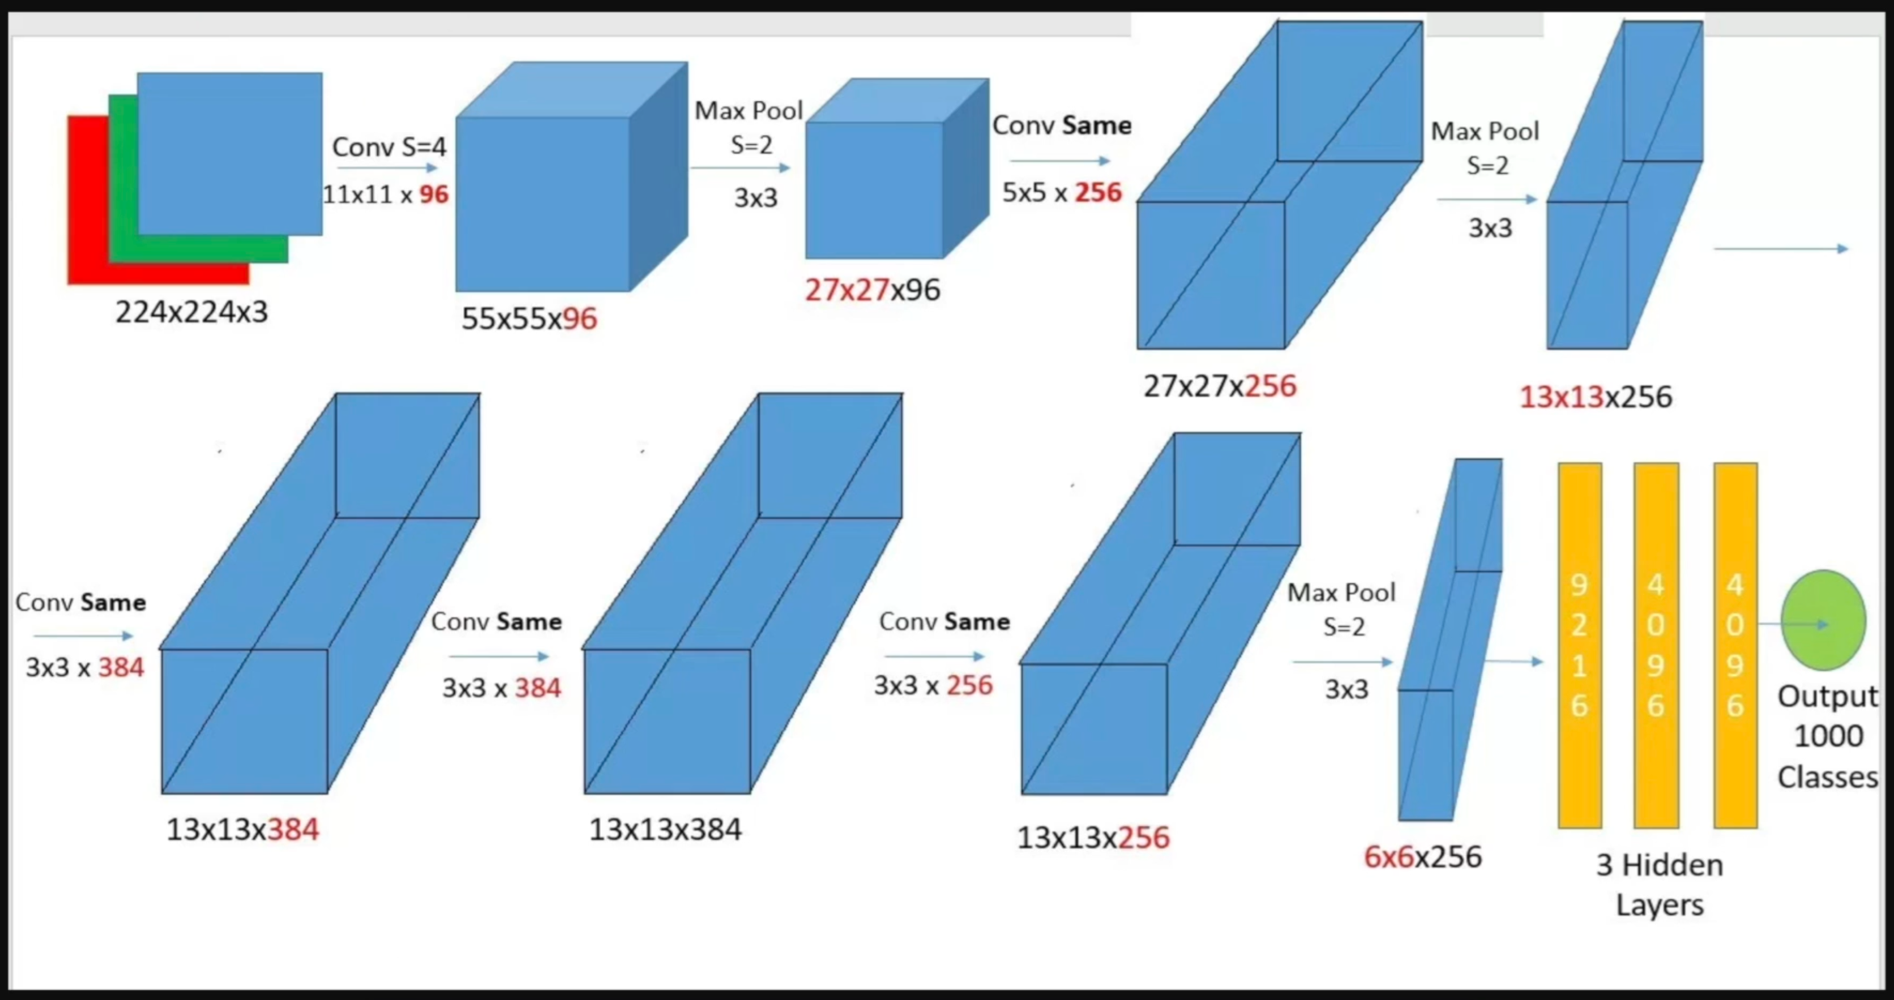

In [17]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# AlexNet Model
alexnet_model = tf.keras.Sequential([
    Input(shape = (224, 224, 3)),

    Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu'),
    MaxPooling2D((3, 3), strides = (2, 2)),

    Conv2D(256, (5, 5), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = (2, 2)),

    Conv2D(384, (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(384, (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),

    MaxPooling2D((3, 3), strides = (2, 2)),

    Flatten(),

    Dense(4096, activation = 'relu'),
    Dropout(0.5),
    Dense(4096, activation = 'relu'),
    Dropout(0.5),

    Dense(1, activation = 'sigmoid')
])

In [18]:
alexnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,751,105 (178.34 MB)

 Trainable params: 46,751,105 (178.34 MB)

 Non-trainable params: 0 (0.00 B)

###**Model Compile**

In [19]:
alexnet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = alexnet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 1
)

500/500 ━━━━━━━━━━━━━━━━━━━━ 199s 398ms/step - accuracy: 0.5006 - loss: 0.6933 - val_accuracy: 0.4890 - val_loss: 0.6939


In [22]:
# Evaluate the model on validation data
val_loss, val_accuracy = alexnet_model.evaluate(validation_dataset)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4863 - loss: 0.6940
Validation Accuracy: 48.90%


In [25]:
alexnet_model.save('saved_model_1.keras')

In [29]:
alexnet_model.save_weights('model_1.weights.h5')

In [30]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/saved_model_1.keras')

In [31]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,253,317 (535.02 MB)

 Trainable params: 46,751,105 (178.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,502,212 (356.68 MB)

In [32]:
history = loaded_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 2
)

Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 429ms/step - accuracy: 0.4948 - loss: 0.6935 - val_accuracy: 0.4890 - val_loss: 0.6933
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 244s 399ms/step - accuracy: 0.4916 - loss: 0.6935 - val_accuracy: 0.4890 - val_loss: 0.6933


In [33]:
history_dict = history.history
history_dict

{'accuracy': [0.49693751335144043, 0.4960624873638153],
 'loss': [0.6934213638305664, 0.6933301687240601],
 'val_accuracy': [0.48899999260902405, 0.48899999260902405],
 'val_loss': [0.6932641267776489, 0.6932825446128845]}

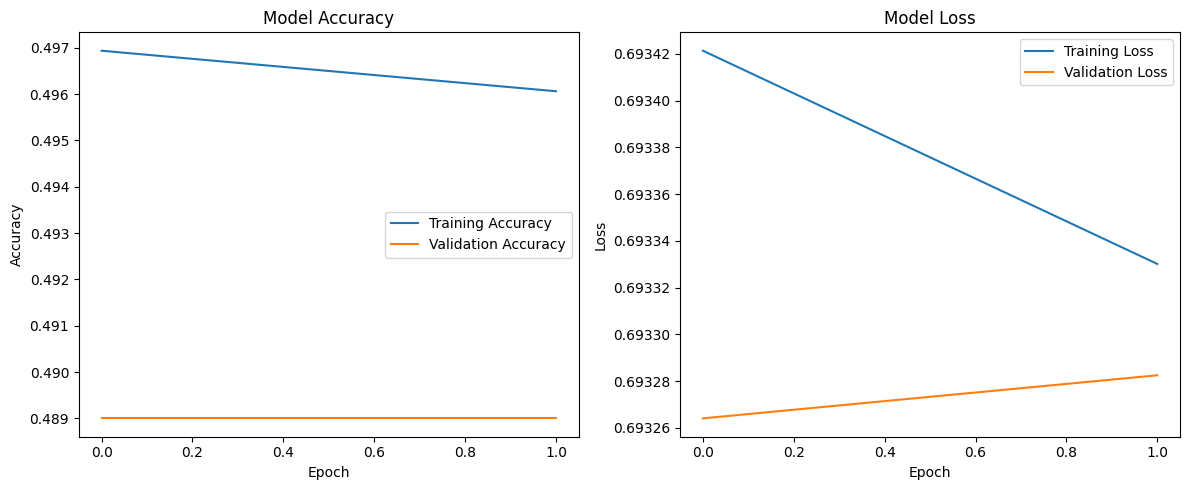

In [34]:
import matplotlib.pyplot as plt

# Assuming you have a `history` object returned from model.fit()
history_dict = history.history  # Access the history dictionary

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


##**Building Lenet Model**
lenet.svg

In [36]:
# LeNet model
lenet_model = tf.keras.Sequential([
    Conv2D(32, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
def preprocess_image(image):
    image = tf.image.resize(image, (32, 32))  # Resize to 32x32
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    return image

In [42]:
train_dataset = train_dataset.map(lambda x, y: (preprocess_image(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (preprocess_image(x), y))

In [43]:
lenet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
history2 = lenet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 1
)

500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 383ms/step - accuracy: 0.5059 - loss: 0.7455 - val_accuracy: 0.5110 - val_loss: 0.6940


In [45]:
# Evaluate the model on validation data
val_loss, val_accuracy = lenet_model.evaluate(validation_dataset)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5170 - loss: 0.6928
Validation Accuracy: 51.10%
